In [120]:
!pip install category_encoders

In [121]:
import pandas as pd
import category_encoders as ce
import numpy as np 

2. Создание признаков

In [122]:
cleared_data = pd.read_csv('data/wine_cleared.zip', index_col=0)

In [123]:
display(cleared_data.head(3))

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [124]:
# для удобства сразу преобразуем признак в int
cleared_data['price_round'] = cleared_data['price'].round().astype(int)

In [125]:
cleared_data.head(2)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15


In [126]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
cleared_data['year'] = cleared_data['title'].str.findall(regex).str.get(0)

In [127]:
display(cleared_data.head(3))

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013


In [128]:
cleared_data['is_usa'] = cleared_data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [129]:
display(cleared_data.head(3))

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1


In [130]:
cleared_data.groupby('country').count().sort_values(by='designation', ascending=False).head(3)

,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
country,,,,,,,,,,,,,,
US,54504,54504,54504,54504,54504,54504,54504,54504,54504,54504,54504,54504,53585,54504
France,22093,22093,22093,22093,22093,22093,22093,22093,22093,22093,22093,22093,20511,22093
Italy,19540,19540,19540,19540,19540,19540,19540,19540,19540,19540,19540,19540,18550,19540


In [131]:
cleared_data['is_france'] = cleared_data['country'].apply(lambda x: 1 if x == 'France' else 0)
cleared_data['is_italy'] = cleared_data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [132]:
display(cleared_data['is_france'].sum())
display(cleared_data['is_italy'].sum())

22093

19540

In [133]:
cleared_data['year'].isna().sum()

4609

In [134]:
cleared_data['old_wine'] = cleared_data['year'].apply(lambda x: 1 if type(x)==str and int(x) < 2010 else 0)

In [135]:
cleared_data['old_wine'].sum()

39781

In [136]:
cleared_data['locality'] = cleared_data['title'].str.findall('\([\w ]+\)').str.get(0)
display(cleared_data[['title', 'locality']])

,title,locality
0,Nicosia 2013 Vulkà Bianco (Etna),(Etna)
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),(Douro)
2,Rainstorm 2013 Pinot Gris (Willamette Valley),(Willamette Valley)
3,St. Julian 2013 Reserve Late Harvest Riesling ...,(Lake Michigan Shore)
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,(Willamette Valley)
...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,(Mosel)
129967,Citation 2004 Pinot Noir (Oregon),(Oregon)
129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,(Alsace)
129969,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),(Alsace)


In [137]:
cleared_data['locality'][129966]

'(Mosel)'

3. Создание признаков. Внешние источники данных

In [138]:
country_population = pd.read_csv('data/country_population.zip', sep=';')

In [139]:
country_population.head(3)

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"


In [140]:
# Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.
country_population[country_population['country'] == 'Italy']['population']

24    59,097,904
Name: population, dtype: object

In [141]:
cleared_data = cleared_data.join(country_population.set_index('country'), on='country')

In [142]:
country_area = pd.read_csv('data/country_area.zip', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [143]:
cleared_data = cleared_data.join(country_area.set_index('country'), on='country')
cleared_data = cleared_data.rename(columns={'area': 'area_country'})
cleared_data

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013,0,0,1,0,(Etna),"59,097,904",301230.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,2011,0,0,0,0,(Douro),"10,347,892",92391.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,Rainstorm,14,2013,1,0,0,0,(Willamette Valley),"333,022,386",9372610.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,St. Julian,13,2013,1,0,0,0,(Lake Michigan Shore),"333,022,386",9372610.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,Sweet Cheeks,65,2012,1,0,0,0,(Willamette Valley),"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,(Mosel),"83,129,285",357022.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,Citation,75,2004,1,0,0,1,(Oregon),"333,022,386",9372610.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,Domaine Gresser,30,2013,0,1,0,0,(Alsace),"68,035,000",547030.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,Domaine Marcel Deiss,32,2012,0,1,0,0,(Alsace),"68,035,000",547030.0


In [144]:
# Создайте новый признак area_country — площадь страны, аналогичный признаку population.

# Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.
cleared_data[cleared_data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area_country']

94    9372610.0
Name: area_country, dtype: float64

4. Создание признаков. Работа с форматом «дата-время»

In [145]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

In [146]:
calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [147]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [148]:
# Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.
# 
# В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls


,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


In [149]:
calls['time_connection'].sum()

89

In [150]:
# Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

# В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum()
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)

In [151]:
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0


In [152]:
calls['is_connection'].sum()

7

In [153]:
# Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

# В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum()
calls['time_diff'] = calls['duration'] + calls['time_connection']

In [154]:
calls['time_diff'].sum()

1144

In [155]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [156]:
# Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

# При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. Параметр нужно установить в значение coerce:
# data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
# Подробнее о назначении этого параметра вы можете прочесть в документации.
cleared_data.head(3)


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013,0,0,1,0,(Etna),"59,097,904",301230.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,2011,0,0,0,0,(Douro),"10,347,892",92391.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,Rainstorm,14,2013,1,0,0,0,(Willamette Valley),"333,022,386",9372610.0


In [157]:
cleared_data['year'] = pd.to_datetime(cleared_data['year'], errors = 'coerce')

In [158]:
cleared_data.head(1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013-01-01,0,0,1,0,(Etna),"59,097,904",301230.0


In [159]:
cleared_data['years_diff'] = (pd.to_datetime('2022-01-12') - cleared_data['year']).dt.days

In [160]:
cleared_data.head(2)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country,years_diff
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,35,2013-01-01,0,0,1,0,(Etna),"59,097,904",301230.0,3298.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,15,2011-01-01,0,0,0,0,(Douro),"10,347,892",92391.0,4029.0


In [161]:
cleared_data['years_diff'].max()

98627.0

5. Кодирование признаков. Методы

In [162]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [163]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [164]:
cleared_data['year'].unique()

<DatetimeArray>
['2013-01-01 00:00:00', '2011-01-01 00:00:00', '2012-01-01 00:00:00',
 '2010-01-01 00:00:00', '2007-01-01 00:00:00', '2009-01-01 00:00:00',
 '2008-01-01 00:00:00', '2014-01-01 00:00:00', '2015-01-01 00:00:00',
                 'NaT', '2016-01-01 00:00:00', '2004-01-01 00:00:00',
 '2003-01-01 00:00:00', '2006-01-01 00:00:00', '2001-01-01 00:00:00',
 '2005-01-01 00:00:00', '2002-01-01 00:00:00', '1887-01-01 00:00:00',
 '2000-01-01 00:00:00', '1999-01-01 00:00:00', '1991-01-01 00:00:00',
 '1997-01-01 00:00:00', '1996-01-01 00:00:00', '1877-01-01 00:00:00',
 '2017-01-01 00:00:00', '1995-01-01 00:00:00', '1872-01-01 00:00:00',
 '1868-01-01 00:00:00', '1898-01-01 00:00:00', '1998-01-01 00:00:00',
 '1852-01-01 00:00:00', '1994-01-01 00:00:00', '1992-01-01 00:00:00',
 '1840-01-01 00:00:00', '1929-01-01 00:00:00', '1912-01-01 00:00:00',
 '1875-01-01 00:00:00', '1976-01-01 00:00:00', '1964-01-01 00:00:00',
 '1848-01-01 00:00:00', '1870-01-01 00:00:00', '1856-01-01 00:00:00',
 '19

In [165]:
ord_encoder = ce.OrdinalEncoder()
year_col = ord_encoder.fit_transform(cleared_data['year'])
cleared_data = pd.concat([cleared_data, year_col], axis=1)

In [166]:
cleared_data.head(3)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country,years_diff,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,2013-01-01,0,0,1,0,(Etna),"59,097,904",301230.0,3298.0,2013-01-01
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,2011-01-01,0,0,0,0,(Douro),"10,347,892",92391.0,4029.0,2011-01-01
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,2013-01-01,1,0,0,0,(Willamette Valley),"333,022,386",9372610.0,3298.0,2013-01-01


In [167]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [168]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


In [169]:
# В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

# В ответе напишите, сколько признаков добавилось после применения кодирования.
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(cleared_data['taster_name'])
cleared_data_dummy = pd.concat([cleared_data, type_bin], axis=1)

In [170]:
cleared_data_dummy.shape[1] - cleared_data.shape[1]

20

In [171]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [172]:
# Закодируйте признак country двоичным способом.

# Сколько новых признаков образовалось после кодирования признака country?
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(cleared_data['country'])
cleared_data_binary = pd.concat([cleared_data, type_bin], axis=1)
cleared_data_binary.shape[1] - cleared_data.shape[1]

6

In [173]:
# На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

# В ответе напишите, сколько признаков добавилось после применения кодирования.
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(cleared_data['taster_twitter_handle'])
cleared_data_binary = pd.concat([cleared_data, type_bin], axis=1)
cleared_data_binary.shape[1] - cleared_data.shape[1]

5

In [174]:
# Используйте следующий датафрейм для задания:

list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
# Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [175]:
encoder = ce.OneHotEncoder(cols=['product', 'payment_type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df[['product', 'payment_type']])
df = pd.concat([df, type_bin], axis=1)
df

,product,price,payment_type,product_Product1,product_Product2,product_Product3,payment_type_Mastercard,payment_type_Visa,payment_type_Amex
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


6. Преобразование признаков. Нормализация. Стандартизация

In [176]:
np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

In [177]:
df

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


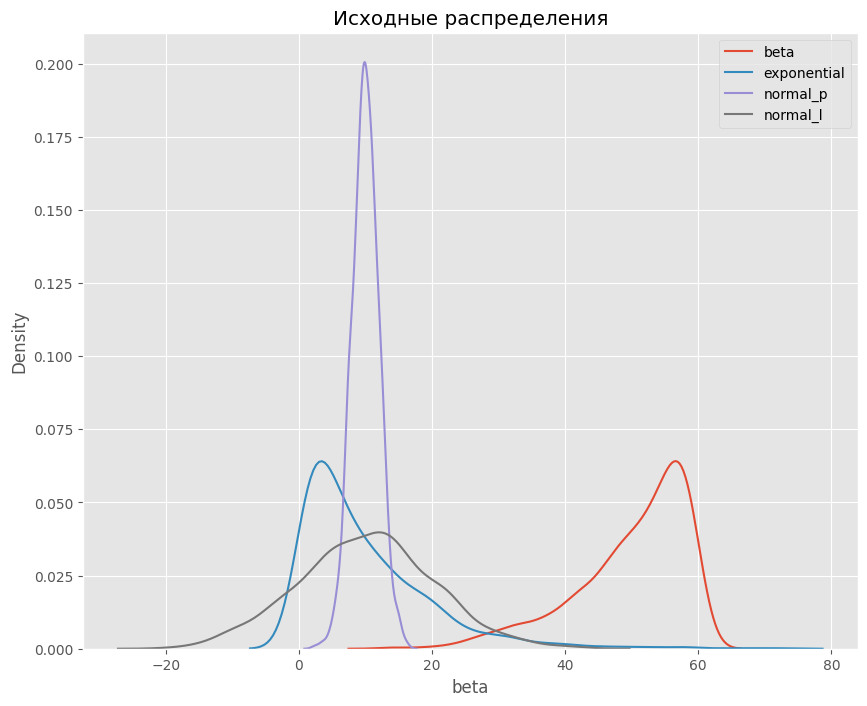

In [178]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [179]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

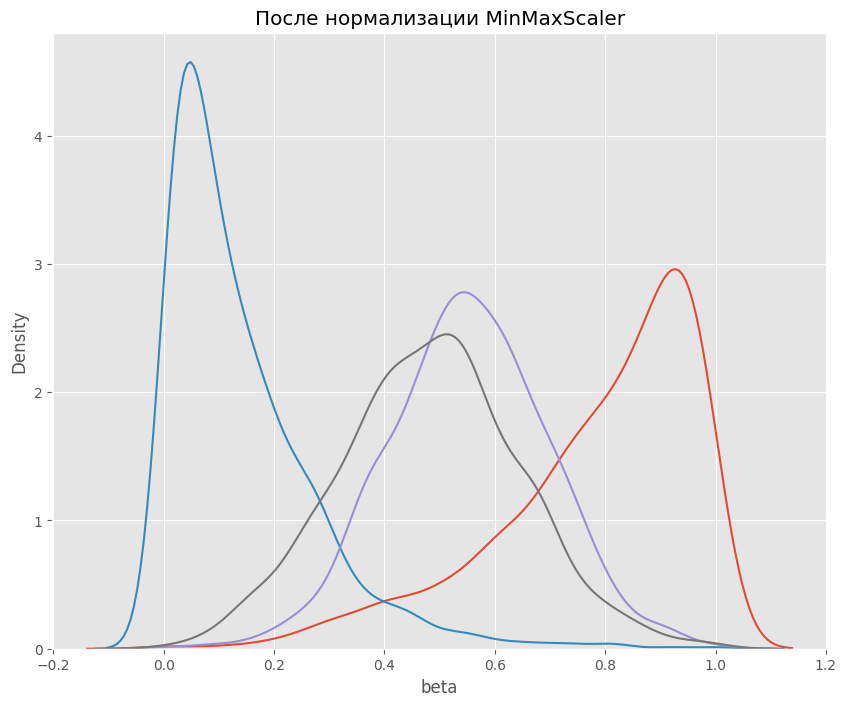

In [180]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

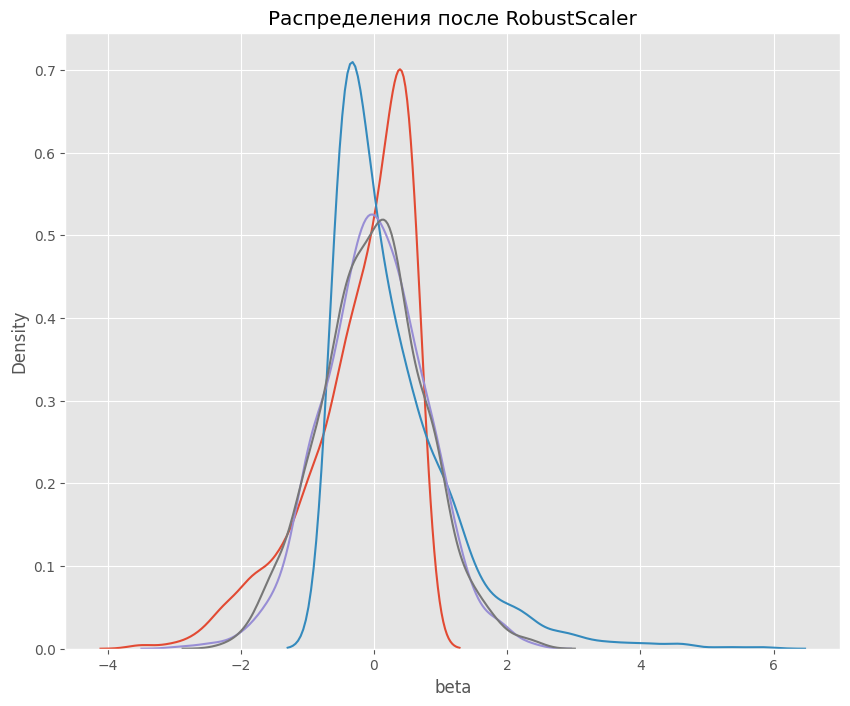

In [181]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

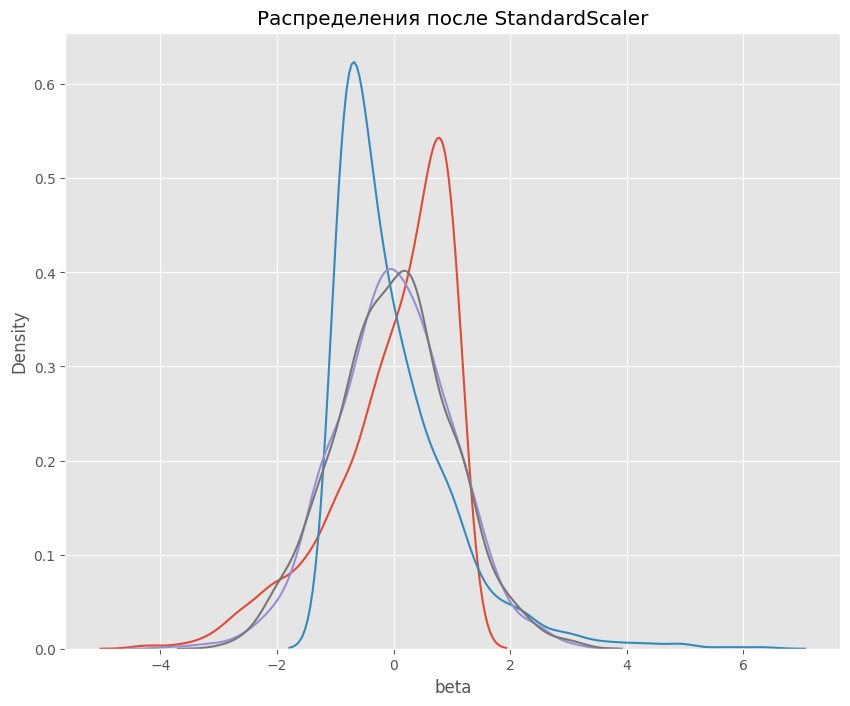

In [182]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [183]:
# Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

# В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
cleared_data_r = r_scaler.fit_transform(cleared_data[['price']])



In [184]:
cleared_data_r.sum()

43500.77493697044

In [185]:
# Стандартизируйте исходный признак price.

# В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(cleared_data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
cleared_data['price'] = df_s
cleared_data['price'][129968]

-0.13551516993245472

 7. Отбор признаков. Мультиколлинеарность

In [186]:
cleared_data[['price']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   129972 non-null  float64
dtypes: float64(1)
memory usage: 6.0 MB


In [187]:
iris = pd.read_csv('data/iris.zip')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: >

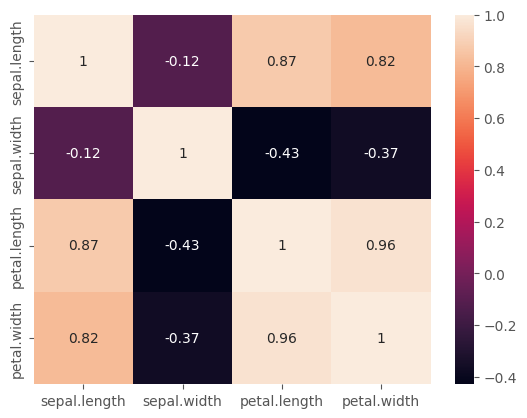

In [188]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [189]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)

In [190]:
display(iris)

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


<Axes: >

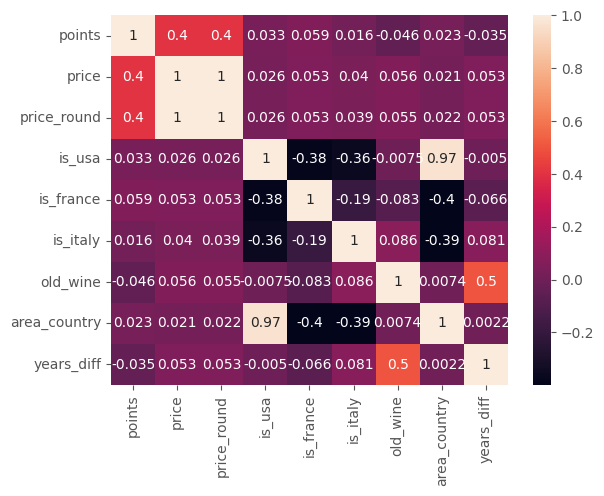

In [191]:
sns.heatmap(cleared_data.corr(numeric_only=True), annot=True)

<Axes: >

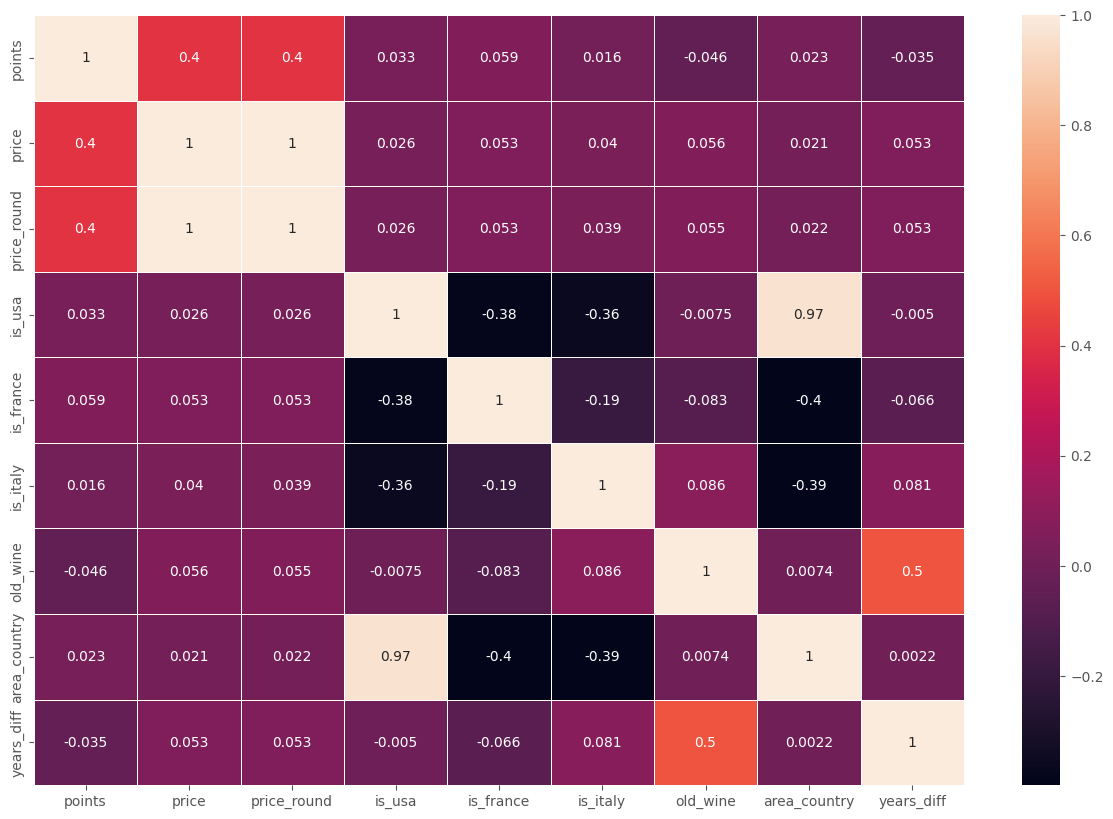

In [192]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cleared_data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

8. Проверка знаний

In [193]:
heart = pd.read_csv('data/heart.zip')
display(heart.head(3))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [194]:
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
# 
# В ответ введите результат выполнения кода heart['old'].sum().

heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
display(heart['old'].sum())

79

In [195]:
# Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

# Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

# Возраст (лет)	Мужчины	Женщины
# до 20	123/76	116/72
# 21-30	126/79	120/75
# 31-40	129/81	127/80
# 41-50	135/83	137/84
# 51-60	142/85	144/85
# 61 и старше	142/80	159/85
# В ответ напишите значение признака trestbps_mean для пациента под номером 300.

# trestbps_mean = {20: ['116/72', '123/76'],
#                  30: ['120/75', '126/79'],
#                  40: ['127/80', '129/81'],
#                  50: ['137/84', '135/83'],
#                  60: ['144/85', '142/85'], 
#                  100: ['159/85', '142/80']
# }

def trestbps_mean(x):
    trestbps_mean = {20: ['116/72', '123/76'],
                 30: ['120/75', '126/79'],
                 40: ['127/80', '129/81'],
                 50: ['137/84', '135/83'],
                 60: ['144/85', '142/85'], 
                 100: ['159/85', '142/80']
}
    for key, val in trestbps_mean.items():
        if x['age'] > key:
            continue
        else:
            return int(val[x['sex']][:3])


    

heart['trestbps_mean'] = heart[['age','sex']].apply(func=trestbps_mean, axis=1)

In [196]:
heart['trestbps_mean']

0      142
1      129
2      137
3      142
4      144
      ... 
298    144
299    135
300    142
301    142
302    144
Name: trestbps_mean, Length: 303, dtype: int64

In [197]:
heart['trestbps_mean'][300]

142

In [198]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [200]:
# Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

# Сколько признаков получилось в датасете?

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) 
# указываем столбец для кодирования
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart_dummy = pd.concat([heart, type_bin], axis=1)

c:\Projects\DS\lessons\.venv\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Projects\DS\lessons\.venv\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Projects\DS\lessons\.venv\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprec

In [209]:
heart_dummy=heart_dummy.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)
heart_dummy.shape[1]

30

In [208]:
heart_dummy.shape[1]

35

In [211]:
heart_dummy

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


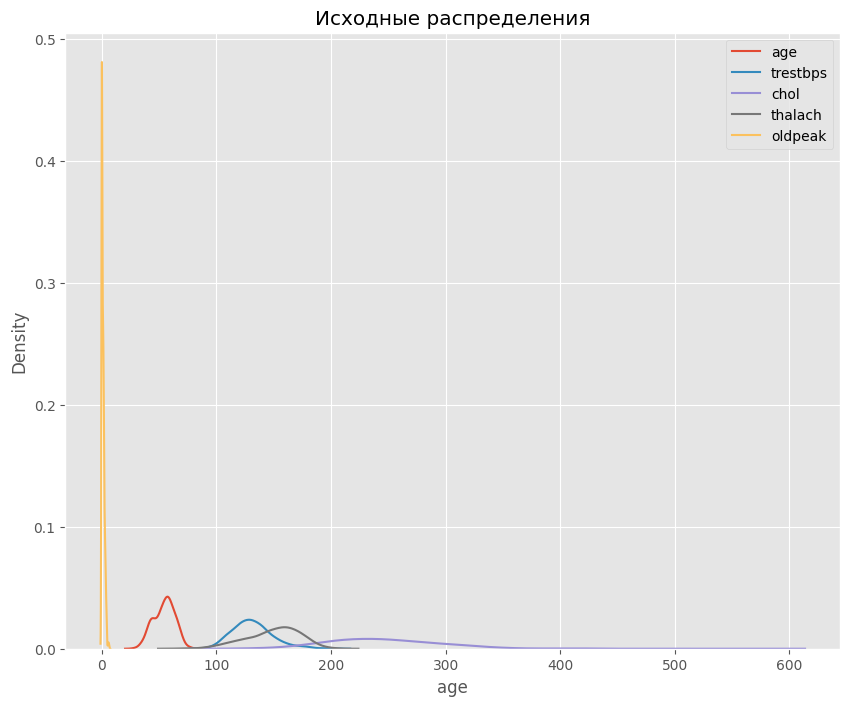

In [212]:
# Нормализуйте все числовые признаки подходящим способом.

# В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart_dummy['age'], ax=ax1, label ='age')
sns.kdeplot(heart_dummy['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart_dummy['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart_dummy['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart_dummy['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend()

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='age', ylabel='Density'>

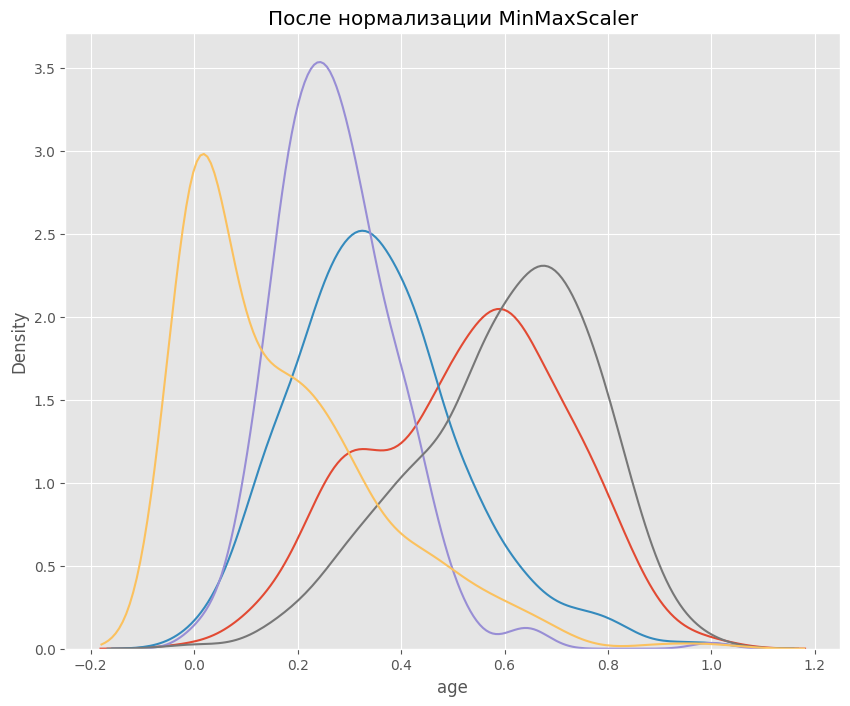

In [215]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(heart_dummy[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['age'], ax=ax1, label ='age')
sns.kdeplot(df_mm['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(df_mm['chol'], ax=ax1, label ='chol')
sns.kdeplot(df_mm['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(df_mm['oldpeak'], ax=ax1, label ='oldpeak')

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='age', ylabel='Density'>

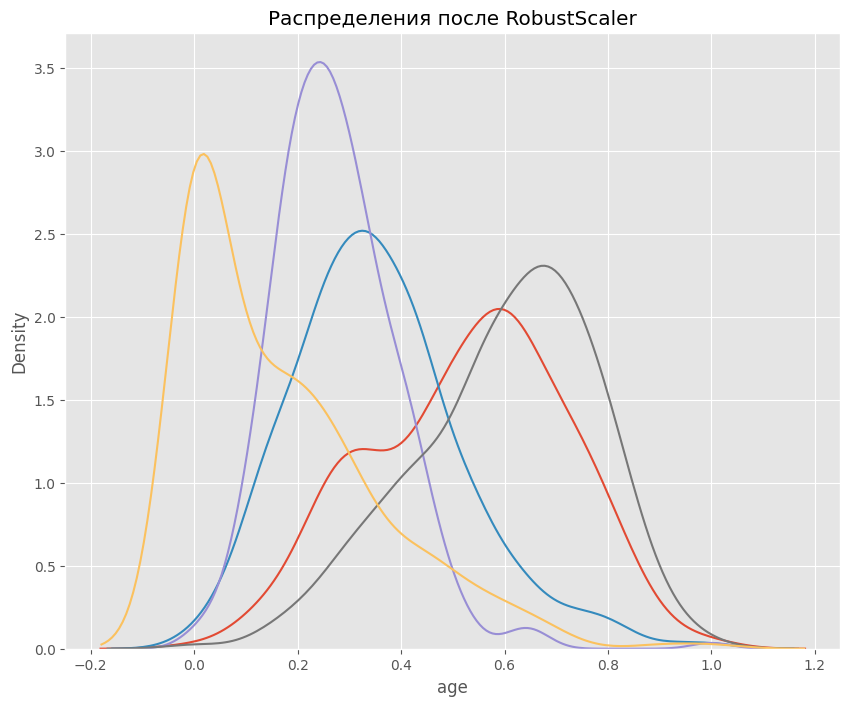

In [216]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart_dummy[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_mm['age'], ax=ax1, label ='age')
sns.kdeplot(df_mm['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(df_mm['chol'], ax=ax1, label ='chol')
sns.kdeplot(df_mm['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(df_mm['oldpeak'], ax=ax1, label ='oldpeak')

In [219]:
df_r['chol'].std()

0.8162322990225203

<Axes: >

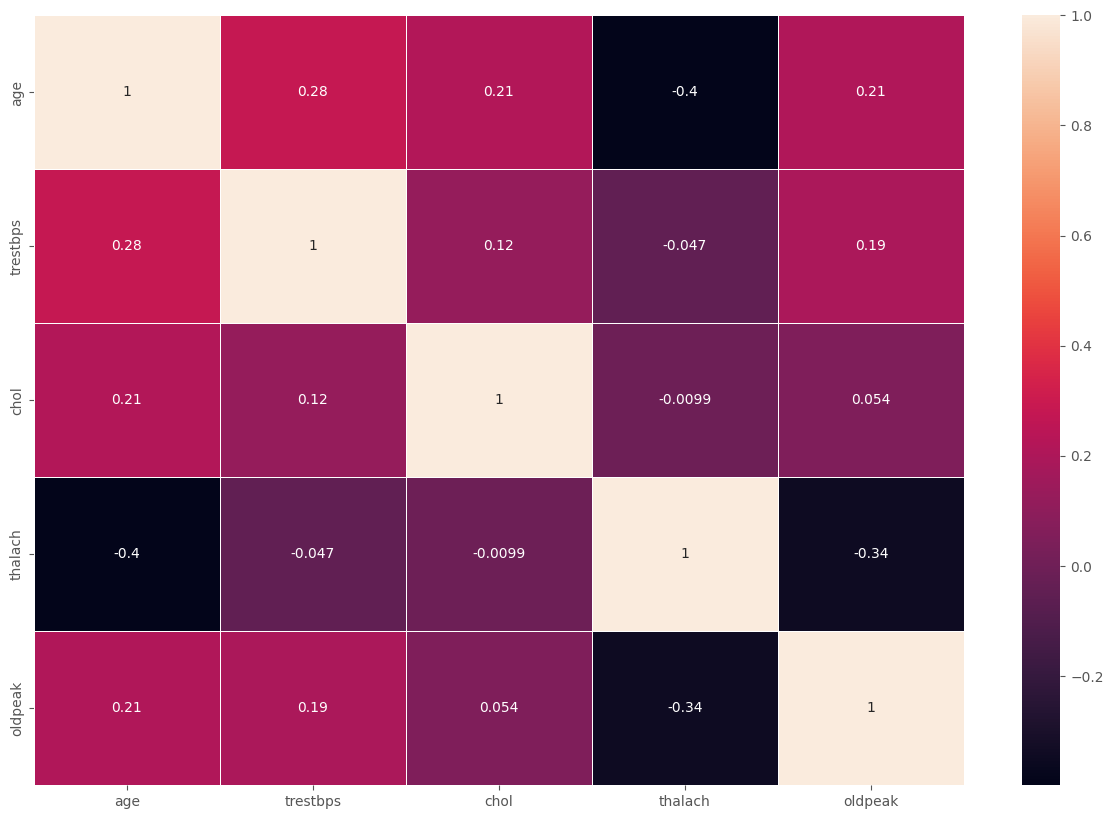

In [221]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_r.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)